# Preparing Publication Quality Figures in Python

## What makes a scientific figure look great?

**Graphical Excellence**

The following short article describes what makes a great scientific data visualization:

P. Kamat, G. V. Hartland, and G. C. Schatz (2014). [Graphical Excellence](https://pubs.acs.org/doi/pdf/10.1021/jz500997e), *J. Phys. Chem. Lett.*, 5(12), 2118–2120.

![image.png](../../media/publication-figure.png)

In addition to the guidelines form Kamat *et al.*, consider the following:
* Your research group may have a prefer software package for plotting besides `matplotlib` such as [Origin](https://www.originlab.com/), [Igor Pro](https://www.wavemetrics.com/products/igorpro), [MATLAB](https://www.mathworks.com/products/matlab.html), or [Seaborn](https://seaborn.pydata.org/) to name a few. Nevertheless, the principles demonstrated in this notebook should apply to almost all publication quality visualizations you make.
* Some research groups prefer to include subticks while others omit them. This is a personal preference and norms may vary across research communities. When in doubt, ask for advisor or another mentor in your community for feedback or suggestions.
* Similarly, the norms for figure captions vary across research communities. For some communities, figure captions are a short paragraph and help the visualization stand on its own. In other research communities, the caption should be a descriptive sentence and all discussion should be located in the main text of the paper. Again, consult your advisor or a mentor about the norms of your research community.
* Some researchers are colorblind, e.g., cannot distinguish between red and green. Ensure your visualizations look good in greyscale. One best practice is to use noth colors and different symbols (e.g., square, circle, triangle) to distinugh datasets. While many researchers no long print articles in black and white to reader (and instead use a computer or tablet), it is important to be considerate of your colleagues who are colorblind.

**Python Format Recommandations**

Based on this paper, we developed the following guidelines to use with `matplotlib`.

Figure 
*   Figure size: 4x4, 4x6.4
*   Dpi: 300

Plot
*   Line width: 3
*   Marker size: 8

Axes
*   Ticks font size: 15
*   Major ticks direction: in
*   Minor ticks direction: in

Axis Label
*   Font size: 16
*   Font weight: bold

All of these examples (below) use these guidelines.

## Example: Data and Model Predictions



In this first example prepared by [Xinhong Liu](https://github.com/lxhowl), we will create a plot in the graphical abstract from:

J. A. Ouimet, X. L., D. J. Brown, E. A. Eugene, T. Popps, Z. W. Muetzel, A. W. Dowling, W. A. Phillip (2022). [DATA: Diafiltration Apparatus for high-Throughput Analysis](https://doi.org/10.1016/j.memsci.2021.119743), *J. Membrane Science*, 641(1), p. 119743.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

For simplicity, we "hard coded" the data into this notebook. In our actually research code, these data are generated automaically, stored in csv files, and read into Python with `pandas`.

In [2]:
# Experiment data stored in dict
data_stru = {'time': [0, 10, 630, 715, 1445, 1480, 1930, 2395, 2430, 3330, 3540, 3665, 4530, 4875, 5360, 6280, 6415, 7085, 7940, 8240, 9030, 9930, 10235, 10930, 11680, 12280, 12575, 13230, 15215],
             'cF_exp': [15.20517956, 15.20517956, 20.17925714, np.nan, np.nan, 27.74228235, 31.0364, np.nan, 34.73451321, 42.10616744, np.nan, 41.21821818, 49.70306667, np.nan, 53.94549091, 55.5364, np.nan, 59.79315676, 63.0364, np.nan, 66.67276364, 68.6614, np.nan, 70.77833548, 74.22284068, 75.4501931, np.nan, 76.72061053, np.nan], 
             'cV_avg': [np.nan, np.nan, np.nan, 2.371375951, 2.971221924, np.nan, np.nan, 3.608081644, np.nan, np.nan, 4.863598959, np.nan, np.nan, 6.184805962, np.nan, np.nan, 7.398282511, np.nan, np.nan, 8.986931928, np.nan, np.nan, 11.26145154, np.nan, np.nan, np.nan, 12.20494634, np.nan, 16.70175135]}

# Model predictions stored in dict
fit_stru = {'time': [0, 10, 630, 715, 1445, 1480, 1930, 2395, 2430, 3330, 3540, 3665, 4530, 4875, 5360, 6280, 6415, 7085, 7940, 8240, 9030, 9930, 10235, 10930, 11680, 12280, 12575, 13230, 15215],
            'cF': [15.20517956, 15.30581000885246, 21.186911048158944, 21.94776258720176, 27.935712649713867, 27.935712649713867, 31.41957200691469, 34.79231254607359, 34.79231254607359, 40.737212176615486, 42.024440019753044, 42.62511080503662, 47.51297790337563, 49.32034465832626, 51.47034529371476, 55.72406395078971, 56.31185664451917, 59.00364601757129, 62.300546660870005, 63.39102918275215, 65.91456478110173, 68.79648688113936, 69.72116826647738, 71.66837157084154, 73.72202692048653, 75.27787416192324, 76.01654487095536, 77.42158102079782, 81.81060107249392], 
            'cH': [1.8971007608000001, 1.857468593269977, 1.7651071567700096, 1.844767802680894, 2.5666499819216466, 2.5666499819216466, 3.045470174932628, 3.5529667541583545, 3.5529667541583545, 4.568847236522133, 4.811750292853133, 4.92814180996477, 5.952827220990674, 6.369556241211926, 6.894439305225153, 8.034207387259743, 8.203010953189972, 9.013552663552899, 10.094858239741818, 10.475147439508877, 11.40039115341059, 12.537180598977393, 12.920607805042627, 13.758398327314904, 14.687274225493889, 15.422320387044207, 15.780811354585317, 16.479645784135432, 18.805287502530643]}

We define a function to create the plot. The optional arguements are toggles to turn certain aspects of the figure on or off. Sometimes, we add extra information to the figure (e.g., title with timestamp of experiment ID) that is useful when organizing results. But for a final publication, we want to remove that aspect of the figure. These toggles make sure customization easy (and clean).

In [3]:
def plot_sim_comparison(data_stru,fit_stru,plot_pred=True,lg=False,save=False):
    """
    Plot simulation results comparing model predictions (lines) and data 
    (symbols) with box annotations

    Arguments:
        data_stru: dictionary containing "time", "cF_exp", and "cV_avg" keys with
            lists of floats as values
        fit_stru: dictionary containing "time", "cF", and "cH" keys with lists
            as floats as values
        plot_pred: boolean. If true, plot the prediction
        lg: boolean. If true, add the legend
        save: boolean. If ture, save the figure to a file.

    Returns:
        nothing
    """    
    fig = plt.figure(figsize=(4,4))
    
    # plot ghost points for legend
    plt.plot([],[],'ms',markersize=8,label='Retentate (Measurement)')
    if plot_pred:
        plt.plot([],[],'g',linewidth=3,label='Retentate (Prediction)')

    plt.plot([],[],'cs',markersize=8,label='Vial (Measurement)')
    if plot_pred:
        plt.plot([],[],'r-',linewidth=3,alpha=.6,label='Permeate (Prediction)')

    # add errorbars (arbitrary for this example)
    cV_avg_err = [0.25*cv for cv in data_stru['cV_avg']] # 25 %
    cF_exp_err = [0.05*cf for cf in data_stru['cF_exp']] # 5 %

    # plot concentration data (with errorbars)/prediction comparison
    plt.errorbar([t/60 for t in data_stru['time']], data_stru['cV_avg'], 
                 yerr = cV_avg_err,
                 fmt='s', ms=8, color='c', # marker settings
                 ecolor = 'b', elinewidth = 2)
    plt.errorbar([t/60 for t in data_stru['time']], data_stru['cF_exp'], 
                 yerr = cF_exp_err,
                 fmt='s', ms=8, color='m',clip_on=False, # marker settings
                 ecolor = 'b', elinewidth = 2)
    
    # code for plotting without error bars
    """
    plt.plot([t/60 for t in data_stru['time']], 
             data_stru['cV_avg'], 'cs',markersize=8)
    plt.plot([t/60 for t in data_stru['time']],
              data_stru['cF_exp'],'ms',markersize=8,clip_on=False)
    """
    if plot_pred:
        plt.plot([t/60 for t in fit_stru['time']],
                  fit_stru['cF'],
                  'g',linewidth=3,alpha=.6)
        plt.plot([t/60 for t in fit_stru['time']],
                  fit_stru['cH'],
                  'r-',linewidth=3,alpha=.6)

    # add annotation
    plt.annotate('Retentate', xy=((fit_stru['time'][15])/60,
                 fit_stru['cF'][15]),  xycoords='data',
                 xytext=(36, 50), weight='bold', textcoords='offset points',
                 size=20, ha='right', va="center",
                 bbox=dict(boxstyle="round", color = "green", alpha=0.1),
                 arrowprops=dict(arrowstyle="wedge,tail_width=0.3",color = "green",alpha=0.1))

    plt.annotate('Permeate', xy=((data_stru['time'][22])/60,
             data_stru['cV_avg'][22]),  xycoords='data',
                 xytext=(36, 50), weight='bold', textcoords='offset points',
                 size=20, ha='right', va="center",
                 bbox=dict(boxstyle="round", color = "red", alpha=0.1),
                 arrowprops=dict(arrowstyle="wedge,tail_width=0.3",color = "red",alpha=0.1))

    plt.xlabel('Time [min]',fontsize=16,fontweight='bold')
    plt.ylabel('Concentration [mM]',fontsize=16,fontweight='bold')

    #plt.xticks(fontsize=15,rotation=45) # rotate ticks (optional)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tick_params(direction="in",top=True, right=True)

    # This commented out code turns on minor ticks
    #plt.minorticks_on() # turn on minor ticks
    #plt.tick_params(which="minor",direction="in",top=True, right=True)
    #plt.gca().axes.xaxis.set_ticklabels([]) # remove tick labels
    #plt.gca().axes.yaxis.set_ticklabels([])
    
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    # invisible overlaped ticks
    ax = plt.gca()
    xticks = ax.xaxis.get_major_ticks()
    xticks[0].label1.set_visible(False)

    if lg:
        # Add legend
        plt.legend(fontsize=10,bbox_to_anchor=(1.02, 0.3),borderaxespad=0)
    plt.show()

    # Save to file (for including in manuscript)
    if save:
        fname = 'concentration'
        fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')
        fig.savefig(fname+'.pdf',dpi=300,bbox_inches='tight')
    

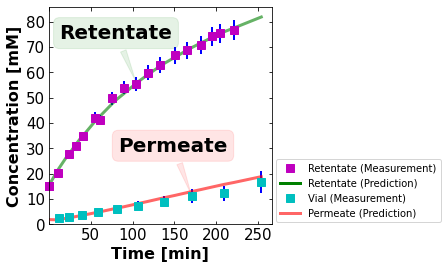

In [4]:
fig = plot_sim_comparison(data_stru,fit_stru,plot_pred=True,lg=True, save=False)

Finally, we check the plot looks good in grayscale (for any colorblind readers).

## Example: Predictions with Uncertainty Bands



In this next example, prepared by [Kyla Jones](https://github.com/kylajones), we will plot (synthetic) observed data, model predictions, and prediction uncertainty bands.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

For simplicity, we define all of the data in this notebook. In actuality, involved calculations we performed to obtain the model predictions and uncertainty estimates.

In [6]:
### Hardcode all data

## y observed

Nobs = 11
Ntemp = 4

empty_obs = np.zeros([Ntemp, Nobs])

# species A
y_a = empty_obs.copy()
y_a[0] = np.array([2.02344425, 1.36860251, 1.03096299, 0.65740269, 0.57241884, 0.34985885, 0.33058912, 0.1681872,  0.21952612, 0.09226589, 0.04931872])
y_a[1] = np.array([2.02586019, 1.08716909, 0.68781963, 0.39403194, 0.16032257, 0.23428204, 0.02076534, 0.04033475, 0.0978981, 0.07540423, 0.07714833])
y_a[2] = np.array([2.06153694, 0.79796719, 0.36428256, 0.28103432, 0.15975079, -0.02254134, 0.07891708, 0.10685296, 0.12181174, 0.02014969, 0.05518219])
y_a[3] = np.array([1.91735135, 0.55511856, 0.23183268, 0.17951325, 0.10104957, 0.07111516, -0.06139098,  0.02229231,  0.11901155,  0.05373958,  0.06958662])

# species B
y_b = empty_obs.copy()
y_b[0] = np.array([-0.03752427, 0.60530102, 0.9955825, 1.37850256, 1.46935982, 1.66645002, 1.66070452, 1.76850223, 1.77915875, 1.76184489, 1.81672473])
y_b[1] = np.array([0.01296338, 0.89639214, 1.39186189, 1.57595299, 1.73540578, 1.69419998, 1.5826509,  1.60318491, 1.66460086, 1.51776157, 1.58146774])
y_b[2] = np.array([-0.02792897, 1.13569095, 1.57844183, 1.67418324, 1.5395483, 1.54537824, 1.44573124, 1.38463391, 1.35080703, 1.28076757, 1.25975991])
y_b[3] = np.array([0.0379667, 1.39594316, 1.59870984, 1.50034396, 1.31129013, 1.27005324, 1.18085389, 1.13550051, 0.96852283, 1.02524932, 0.98662983])

# species C
y_c = empty_obs
y_c[0] = np.array([0.01385988, 0.07233084, 0.0138011, 0.04580091, 0.01139069, 0.00281789, 0.04759571, 0.03531502, 0.10974563, 0.14194261, 0.12514075])
y_c[1] = np.array([-0.07376425, 0.0243219, 0.00364111, 0.05713541, 0.08313851, 0.18909311, 0.23693068, 0.26420506, 0.3413782, 0.32597304, 0.27979896])
y_c[2] = np.array([0.00943458, 0.01096848, 0.06149562, 0.18328175, 0.285206, 0.38444738, 0.52486223, 0.55009396, 0.51287361, 0.65236054, 0.72341975])
y_c[3] = np.array([-0.01221299, 0.07851271, 0.24902781, 0.44011205, 0.54449372, 0.68277854, 0.74685861, 0.78954617, 0.85525827, 0.92077101, 0.98371899])

## y predicted

Npred = 21

empty_pred = np.zeros([Ntemp, Npred])

# species A
y_a_star = empty_pred.copy()
y_a_star[0] = np.array([2, 1.59768464, 1.2762981, 1.01956093, 0.81446842, 0.65063184, 0.51975225, 0.41520009, 0.3316794, 0.26495954, 0.21166089, 
                        0.16908368, 0.1350712, 0.10790059, 0.08619556, 0.06885666, 0.05500561, 0.04394081, 0.03510178, 0.02804079, 0.02240017])
y_a_star[1] = np.array([2, 1.43192894, 1.02521025, 0.73401411, 0.52552803, 0.3762594, 0.26938836, 0.1928725, 0.13808985, 0.09886743, 0.07078557, 
                         0.05067995, 0.03628504, 0.0259788, 0.0185999, 0.01331687, 0.0095344, 0.00682629, 0.00488738, 0.00349919, 0.0025053])
y_a_star[2] = np.array([2.00000000e+00, 1.27514755e+00, 8.13000633e-01, 5.18347881e-01, 3.30485014e-01, 2.10708578e-01, 1.34342263e-01, 8.56531035e-02,
                        5.46101724e-02, 3.48180137e-02, 2.21990524e-02, 1.41535336e-02, 9.02392180e-03, 5.75341587e-03, 3.66822707e-03, 2.33876537e-03,
                        1.49113546e-03, 9.50708864e-04, 6.06147038e-04, 3.86463454e-04, 2.46398963e-04])
y_a_star[3] = np.array([2.00000000e+00, 1.13393738e+00, 6.42906988e-01, 3.64508132e-01, 2.06664698e-01, 1.17172413e-01, 6.64330892e-02, 3.76654815e-02,
                        2.13551486e-02, 1.21077006e-02, 6.86468715e-03, 3.89206267e-03, 2.20667767e-03, 1.25111715e-03, 7.09344247e-04, 4.02175978e-04,
                        2.28021187e-04, 1.29280873e-04, 7.32982072e-05, 4.15577884e-05, 2.35619648e-05])

# species B
y_b_star = empty_pred.copy()
y_b_star[0] = np.array([0.03270519, 0.39926139, 0.68731271, 0.9354765, 1.15467428, 1.33761972, 1.47392424, 1.56736103, 1.64477813, 1.72322029, 1.78283252, 
                        1.80362121, 1.80259763, 1.80761942, 1.82500871, 1.84425379, 1.85162638, 1.84487036, 1.84124298, 1.85587223, 1.88118926])
y_b_star[1] = np.array([0.01671025, 0.55383436, 0.91650889, 1.17570006, 1.36693187, 1.5015587, 1.5820901, 1.62015396, 1.64645615, 1.67929046, 1.69878894,
                         1.68435974, 1.65219138, 1.629514, 1.62213033, 1.6187281, 1.60468673, 1.57720045, 1.55336206, 1.54843504, 1.55513168])
y_b_star[2] = np.array([-0.00610998, 0.70773819, 1.11833386, 1.3416306, 1.4524385, 1.49667326, 1.50216811, 1.48843442, 1.4704685, 1.45434913, 1.43575602,
                        1.40975002, 1.37968974, 1.3530836, 1.3326319, 1.31447336, 1.29341394, 1.2690736, 1.24668352, 1.23083234, 1.21997388])
y_b_star[3] = np.array([-0.03278059, 0.82392828, 1.23715807, 1.40009353, 1.42839638, 1.39244126, 1.33332529, 1.2726671,  1.21982743, 1.17694373, 
                        1.14258333, 1.11470584, 1.0921472, 1.07408545, 1.05895914, 1.04463014, 1.02965292, 1.01413203, 0.99917604, 0.98542831, 0.97209606])

# species C
y_c_star = empty_pred
y_c_star[0] = np.array([-0.03270519, 0.00305397, 0.03638919, 0.04496257, 0.0308573, 0.01174844, 0.00632351, 0.01743888, 0.02354247, 0.01182017, 
                        0.00550658, 0.02729511, 0.06233117, 0.08447999, 0.08879573, 0.08688955, 0.09336801, 0.11118882, 0.12365524, 0.11608698, 0.09641057])
y_c_star[1] = np.array([-0.01671025, 0.0142367, 0.05828086, 0.09028582, 0.10754011, 0.12218191, 0.14852154, 0.18697355, 0.21545399, 0.22184211, 0.2304255,
                        0.26496031, 0.31152357, 0.3445072, 0.35926977, 0.36795504, 0.38577887, 0.41597325, 0.44175055, 0.44806577, 0.44236302])
y_c_star[2] = np.array([0.00610998, 0.01711426, 0.0686655,  0.14002152, 0.21707649, 0.29261817, 0.36348962, 0.42591248, 0.47492132, 0.51083286, 0.54204493, 
                        0.57609645, 0.61128634, 0.64116298, 0.66369988, 0.68318787, 0.70509493, 0.72997569, 0.75271033, 0.76878119, 0.77977973])
y_c_star[3] = np.array([0.03278059, 0.04213434, 0.11993494, 0.23539834, 0.36493892, 0.49038633, 0.60024162, 0.68966742, 0.75881742, 0.81094857, 
                        0.85055198, 0.88140209, 0.90564613, 0.92466343, 0.94033152, 0.95496768, 0.97011906, 0.98573869, 1.00075066, 1.01453013, 1.02788038])

## variance of predictions

# species A
var_a = np.array([[0.05719945, 0.06328314, 0.07272865, 0.07949682, 0.08249553, 0.08242237, 0.08037767, 0.07733186, 0.07397983, 0.07075224, 0.06787686,
                   0.06544412, 0.06346087, 0.06188887, 0.0606701, 0.05974194, 0.05904548, 0.05852935, 0.0581509, 0.05787595, 0.0576778],
                  [0.05719945, 0.05976117, 0.06245206, 0.06325761, 0.06272024, 0.0616213, 0.06046344, 0.05947678, 0.05872418, 0.05818864, 0.05782545,
                    0.05758773, 0.05743631, 0.05734195, 0.05728416, 0.0572493, 0.05722852, 0.05721627, 0.05720911, 0.05720497, 0.05720258],
                  [0.05719945, 0.06055497, 0.06265554, 0.06218973, 0.06080576, 0.05949002, 0.05854026, 0.05794131, 0.05759333, 0.05740209, 0.05730114,
                    0.05724947, 0.05722364, 0.05721099, 0.05720489, 0.05720199, 0.05720062, 0.05719998, 0.05719969, 0.05719956, 0.0571995],
                  [0.05719945, 0.06748288, 0.07042203, 0.06676295, 0.06266473, 0.0599445, 0.05847011, 0.0577554, 0.05743287, 0.05729441, 0.05723713, 
                   0.0572141, 0.05720505, 0.05720156, 0.05720023, 0.05719974, 0.05719955, 0.05719948, 0.05719946, 0.05719945, 0.05719945]])

# species B
var_b = np.array([[0.08041407, 0.08548342, 0.0942853, 0.10031488, 0.10237395, 0.10161885, 0.09899488, 0.09577745, 0.09238062, 0.08946731,
                   0.08694899, 0.08513801, 0.08373001, 0.08292177, 0.08236026, 0.08223461, 0.08220564, 0.08247615, 0.0827256, 0.0832465, 0.08456729],
                  [0.06996611, 0.07250687, 0.07466939, 0.07500611, 0.07410654, 0.07300714, 0.07191716, 0.07126404, 0.07080229, 0.07072385, 0.07069991,
                   0.07091747, 0.07107363, 0.07138765, 0.07158516, 0.07190796, 0.07210113, 0.07243694, 0.07272244, 0.07309388, 0.07318622],
                  [0.10459769, 0.10714292, 0.10847073, 0.10738268, 0.10580067, 0.10463459, 0.10399859, 0.10375836, 0.10374181, 0.10383653, 0.10396538,
                   0.10410001, 0.10421888, 0.10432586, 0.10441817, 0.10451517, 0.10463752, 0.10483768, 0.10511517, 0.10537128, 0.10597695],
                  [0.14939687, 0.15640947, 0.15673244, 0.15218987, 0.14859712, 0.14695313, 0.1465719, 0.14673995, 0.14705303, 0.14734157, 0.14755549,
                   0.1476938, 0.14777069, 0.1478045, 0.14781535, 0.14782897, 0.14787997, 0.14801416, 0.14831035, 0.1490566, 0.15126877]])

# species C
var_c = np.array([[0.13761351, 0.14268368, 0.151495, 0.1575553, 0.15967659, 0.15902096, 0.15653546, 0.15349447, 0.15030938, 0.14763968, 0.14539309,
                   0.14387839, 0.14278781, 0.14231509, 0.1421044, 0.14234241, 0.14268768, 0.14334096, 0.14397984, 0.14489511, 0.14661361],
                  [0.12716556, 0.12970804, 0.13188809, 0.13227501, 0.13146534, 0.13049419, 0.12956507, 0.12909831, 0.1288415,  0.12898045, 0.1291812,
                   0.12962646, 0.1300098,  0.13054754, 0.13096292, 0.13149577, 0.13188955, 0.13241524, 0.1328789, 0.13341603, 0.13366104], 
                  [0.16179714, 0.16434671, 0.16571033, 0.16470349, 0.16323702, 0.16220358, 0.16170392, 0.16159574, 0.16170286, 0.16191099, 0.16214216,
                   0.16236761, 0.1625656, 0.16273996, 0.16288795, 0.1630292, 0.16318473, 0.16340753, 0.16369774, 0.16395741, 0.16455827],
                  [0.20659632, 0.21363847, 0.21416268, 0.20998773, 0.20681539, 0.2055619, 0.20550853, 0.20593768, 0.2064511,  0.20688658,  0.20720041, 
                   0.20739674, 0.20749437, 0.20751608, 0.20748645, 0.20743568, 0.2074028, 0.20743782, 0.20762347, 0.20825134, 0.21034041]])

# set controls for predictions:
t_star = np.linspace(0,1.0,Npred) # range of times we wish to predict over
    
T_star = np.array([300.00,350.00,400.00,450.00]) # range of temperatures we wish to predict over

assert len(T_star) == Ntemp, "Dimension mismatch"

t = np.linspace(0,1.0,Nobs) # time-series used to generate ζ

Next, we create the four subplots.

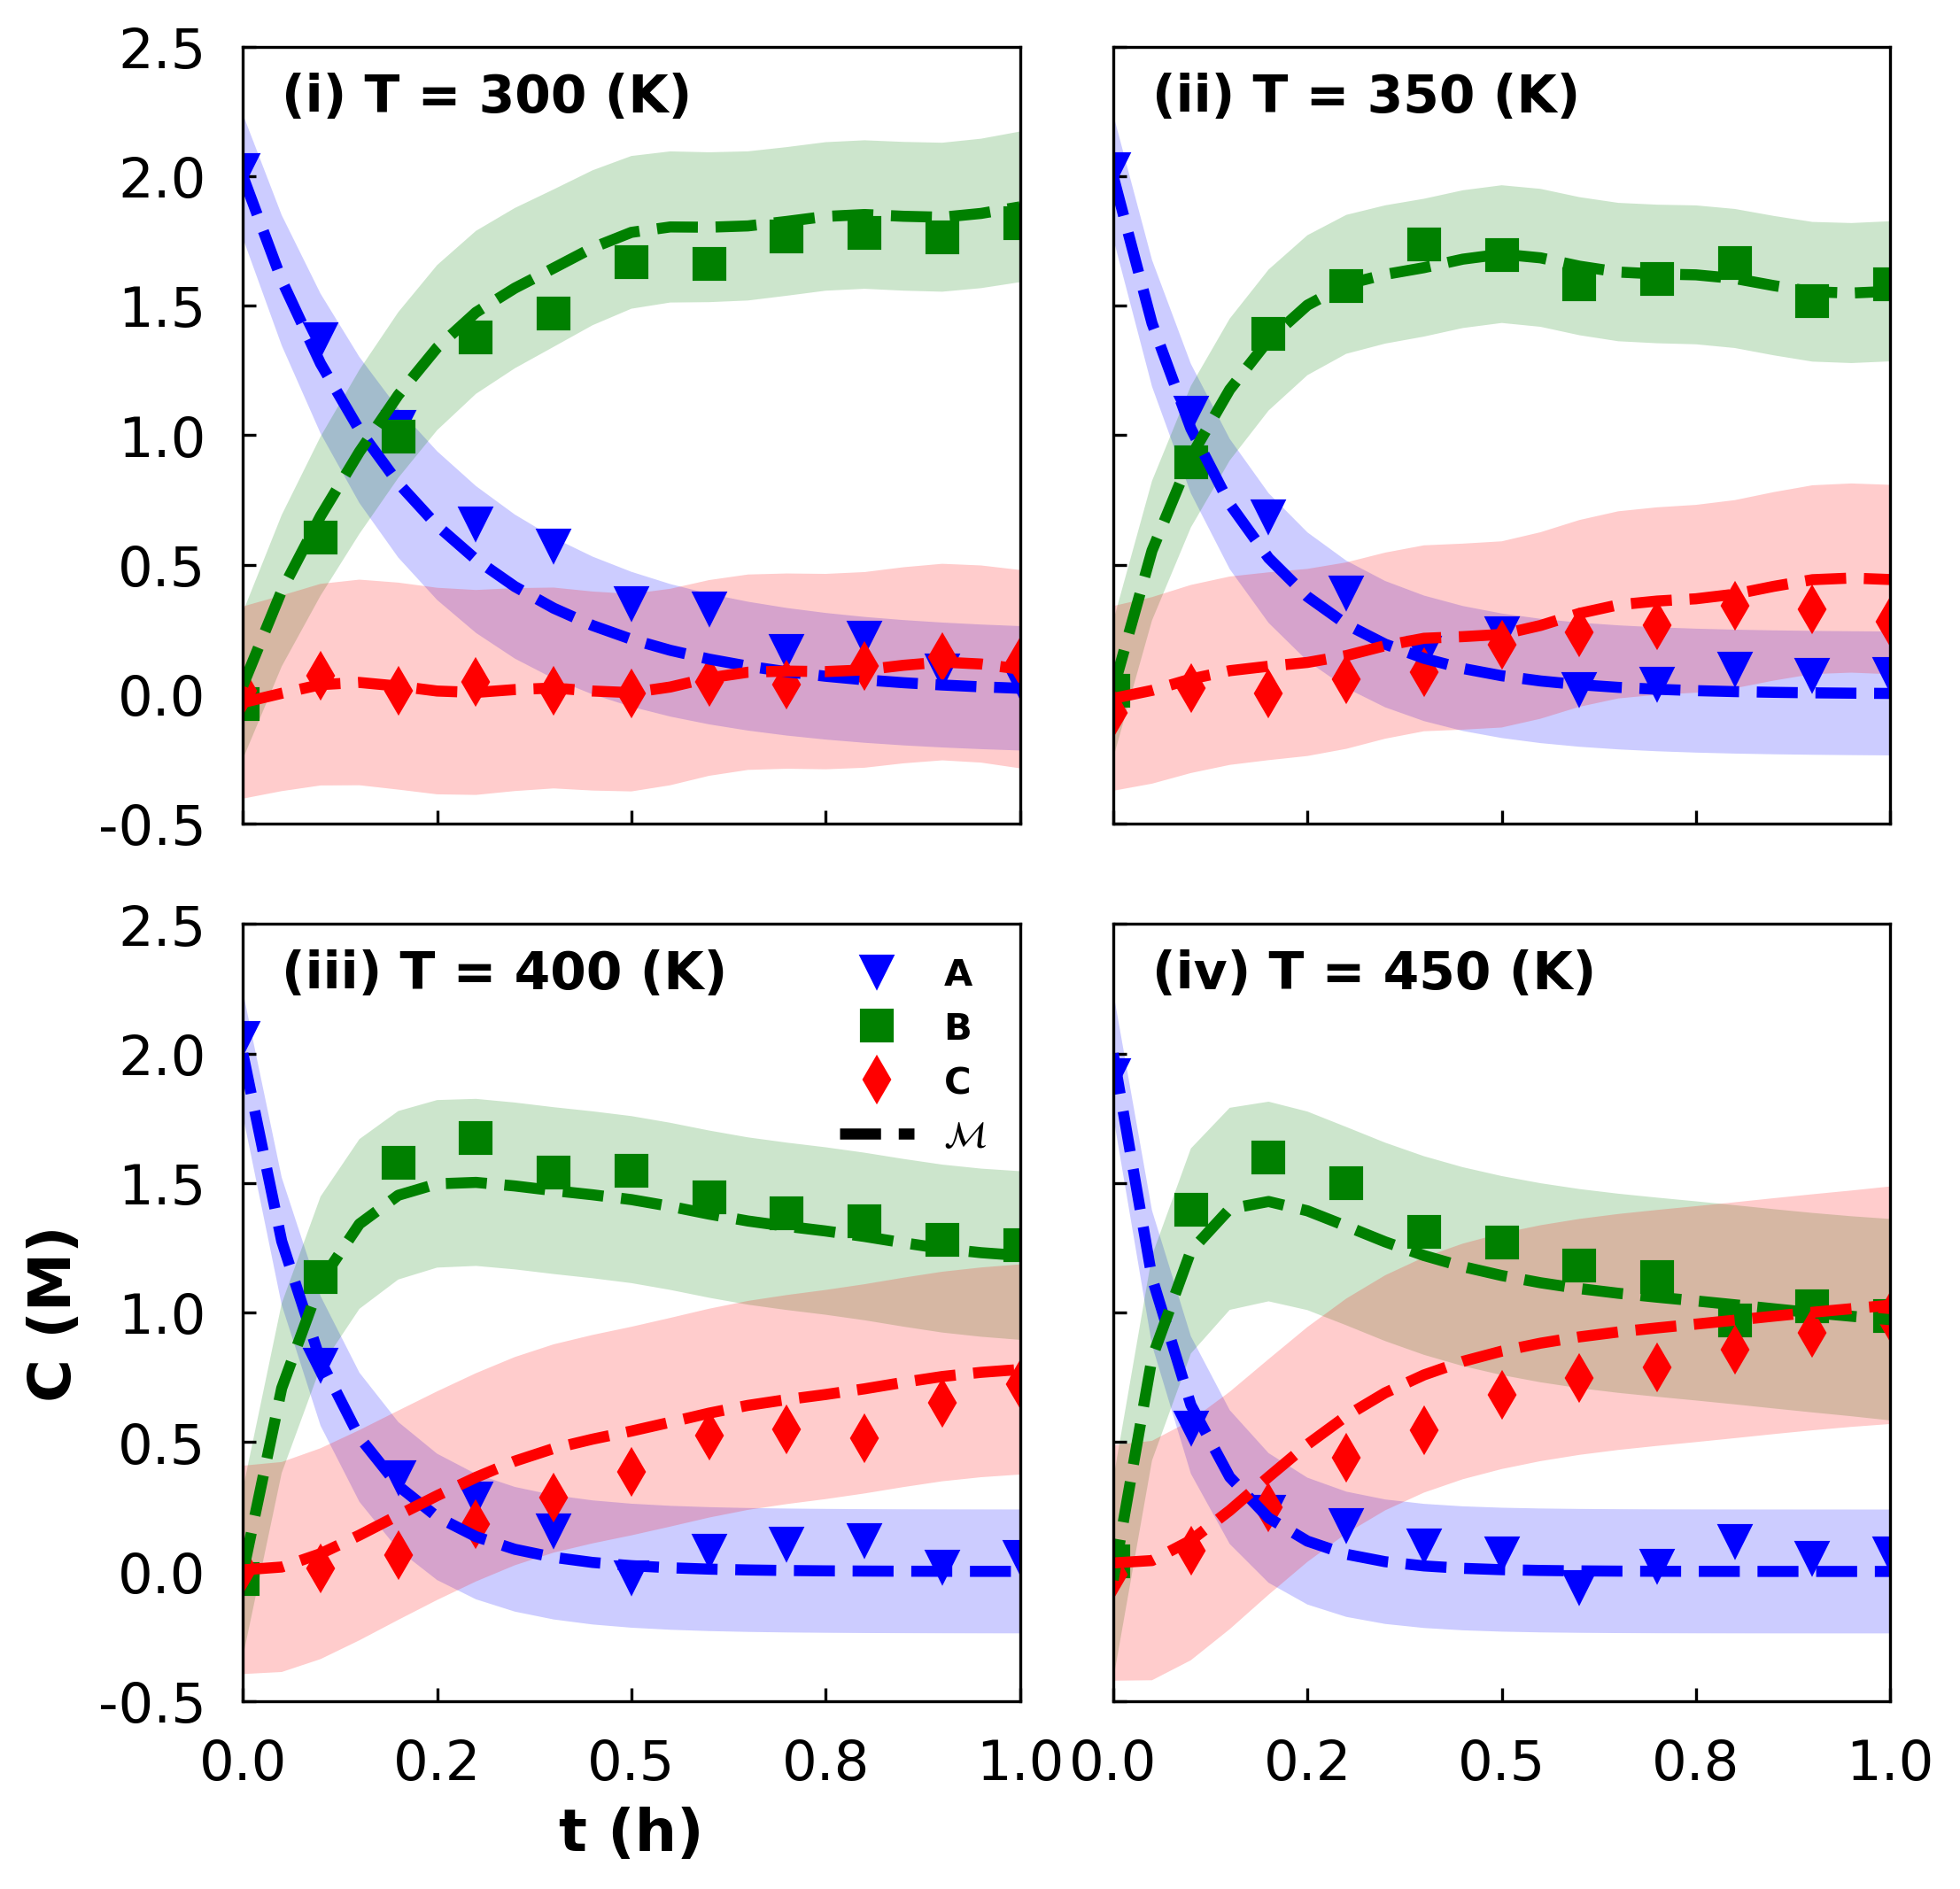

In [7]:
# create a figure of 2x2 subplots
fig, axs = plt.subplots(2, 2, dpi = 300, figsize =(8,8))

for j in np.arange(0,Ntemp):

        ## some conditional formatting:
        # determine the location of each subplot [a,b] and its subplot title (i-iv+temperature)
        # to be displayed in subplot corner of choice (anch = 'NW,SW,..etc.')

        if j == 0: # T = 300 K
            a = 0 
            b = 0
            anch = 'SE' # South East
            tit = r'(i) ' 

        elif j == 1: # T = 350 K
            a = 0
            b = 1
            anch = 'SW' # Soutwest
            tit = r'(ii) '

        elif j == 2: # T = 400 K
            a = 1
            b = 0
            anch = 'SE' # South East
            tit = r'(iii) '

        elif j == 3: # T= 450 K
            a = 1
            b = 1
            anch = 'SW' # South West
            tit = r'(iv) '

        # set plot properties once so they can be easily changed later
        lin_styl = '--' # set linestyle
        mrk_siz = 8 # set markersize
        lin_wdth = 3 # set linewidth
        shade_intensity = 0.2 # set shade intensity
        
        # plot observations on subplot axes[a,b]
        axs[a,b].plot(t, y_a[j,:],'bv', markersize = mrk_siz)
        axs[a,b].plot(t, y_b[j,:],'gs', markersize = mrk_siz)
        axs[a,b].plot(t, y_c[j,:],'rd', markersize = mrk_siz)
        
        # plot hybrid model predictions
        axs[a,b].plot(t_star, y_a_star[j,:],'b'+str(lin_styl), label = r'$C_A$', linewidth = lin_wdth, markersize = mrk_siz)
        axs[a,b].plot(t_star, y_b_star[j,:],'g'+str(lin_styl), label = r'$C_B$', linewidth = lin_wdth, markersize = mrk_siz)
        axs[a,b].plot(t_star, y_c_star[j,:],'r'+str(lin_styl), label = r'$C_A$', linewidth = lin_wdth, markersize = mrk_siz)

        # shade +/- one standard deviation from prediction
        axs[a,b].fill_between(t_star, y_a_star[j,:] - var_a[j,:]**0.5, 
                              y_a_star[j,:] + var_a[j,:]**0.5, facecolor='b', alpha = shade_intensity)
        
        axs[a,b].fill_between(t_star, y_b_star[j,:] - var_b[j,:]**0.5, 
                              y_b_star[j,:] + var_b[j,:]**0.5, facecolor='g', alpha = shade_intensity)
        
        axs[a,b].fill_between(t_star, y_c_star[j,:] - var_c[j,:]**0.5, 
                              y_c_star[j,:] + var_c[j,:]**0.5, facecolor='r', alpha = shade_intensity)
        
        # set no. of decimal places for axes labels
        axs[a,b].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[a,b].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        # set tick marks insize plot, re-size axis labels
        axs[a,b].tick_params(axis='both', which='major', direction='in', pad = 10, labelsize = 15)
        
        # create subplot label for temperature
        axs[a,b].text(0.05, 2.25, str(tit)+'T = '+str(int(T_star[j]))+' (K)', fontsize = 14, fontweight = 'bold')
        
        # set bounds for plotting
        axs[a,b].set_ylim([-0.5,2.5])
        axs[a,b].set_xlim([0,1])
        
        ## make the plots square-shaped:

        # define y-unit to x-unit ratio
        ratio = 1.0
        
        # get x and y limits
        x_left, x_right = axs[a,b].get_xlim()
        y_low, y_high = axs[a,b].get_ylim()
        
        #set aspect ratio
        axs[a,b].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio, anchor = anch) 

# for the entire plot: 

# optional : include a figure title
# fig.suptitle('Hybrid model predictions with epistemic and aleatoric uncertainty', fontsize = 16, fontweight = 'bold')

# remove repitive axis and tick labels
for ax in fig.get_axes():
        ax.label_outer()

# set axis labels
axs[1,0].set_xlabel(r't (h)', fontsize = 16, fontweight = 'bold')
axs[1,0].set_ylabel(r'C (M)', fontsize = 16, fontweight = 'bold')

# optional: manually tune spacing between plots
plt.subplots_adjust(top = 0.92, wspace = 0.12, hspace = 0.08)
        
# create a custom legend for plot
legend_elements = [Line2D([0], [0], marker = 'v', color = 'b', label = r'$\bf{A}$', markersize = mrk_siz, lw = 0),
                    Line2D([0], [0], marker = 's', color = 'g', label = r'$\bf{B}$', markersize = mrk_siz, lw = 0),
                    Line2D([0], [0], marker = 'd', color = 'r', label = r'$\bf{C}$', markersize = mrk_siz, lw = 0),
                    Line2D([0], [0], color = 'k', linestyle = lin_styl, label = r'$\mathcal{M}$', lw = lin_wdth)]

# place legend
axs[1,0].legend(handles = legend_elements, loc = 'upper right', fontsize = 10, frameon = False)

# optional: save in desired format
path_to_fig = 'example_fig'
fmt = '.pdf'
fig.savefig(path_to_fig + fmt, dpi = 1200, bbox_inches = 'tight')

## Example: Bar Charts for Sensitivity Analysis

In this example, prepared by [Maddie Watson](https://github.com/MadelynnWatson), we plot results from a techneconomic sensitivity analysis. This plot is adapted from:

C. O'Brien, M. Watson, A. Dowling (2022). Challenges and Opportunities in Converting CO2 to Carbohydrates. *under review* [code](https://github.com/dowlinglab/CO2-to-carbs-analysis/blob/main/Watson_supporting_calculations.ipynb)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Organize Data into Pandas Dataframe

# Values are put into a pandas data frame so they can be sorted
# params is the parameter name of each bar 
# values is the difference between the max and min of the parameter variation (bar width)
# start is the minimum point of the parameter variation and defines the starting value of each bar

df = pd.DataFrame(
    dict(
        params = ['Parameter 1','Parameter 2','Parameter 3','Parameter 4','Parameter 5','Parameter 6'],
        values = [1 ,0.5,0.8,0.4,5,10],
        start = [-3,-2,-2.5,-2,12,15]
  
    )
)

print(df)

        params  values  start
0  Parameter 1     1.0   -3.0
1  Parameter 2     0.5   -2.0
2  Parameter 3     0.8   -2.5
3  Parameter 4     0.4   -2.0
4  Parameter 5     5.0   12.0
5  Parameter 6    10.0   15.0


In [9]:
#Sort Data Frame

# The command below sorts the 'values' (barwidth) so they are displayed in the diagram as highest to lowest
# This ensures the tornado-like appearence
df_sorted = df.sort_values('values')

# re-index the dataframe to go 0-5 after sorting
df_sorted['index'] = np.arange(0,len(df['params']),1)
df_sorted.set_index('index',inplace=True)

print(df_sorted)

            params  values  start
index                            
0      Parameter 4     0.4   -2.0
1      Parameter 2     0.5   -2.0
2      Parameter 3     0.8   -2.5
3      Parameter 1     1.0   -3.0
4      Parameter 5     5.0   12.0
5      Parameter 6    10.0   15.0


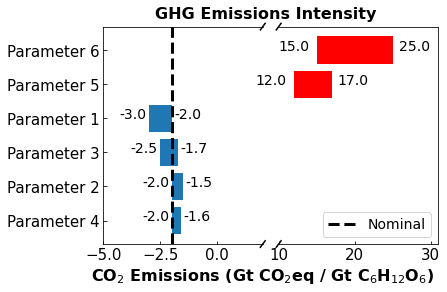

In [10]:
# Plot Generation

# Broken axis example
# To create the broken axis create 2 subplots and merge together
fig, (ax,ax2) = plt.subplots(1,2,sharey=True)


p = ax.barh('params','values', data=df_sorted,left='start')
h = ax2.barh('params','values', data=df_sorted,left='start',color='red')

# Formatting
plt.suptitle('GHG Emissions Intensity',y=0.95, fontsize=16, fontweight = 'bold')
ax.set_xlabel('CO$_2$ Emissions (Gt CO$_2$eq / Gt C$_6$H$_{12}$O$_6$)',fontsize=16, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=15)
ax2.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# Add a Nominal line for comparisons
ax2.axvline(-2, color='black', linewidth=3, linestyle='--',label='Nominal')
ax.axvline(-2, color='black', linewidth=3, linestyle='--',label='Nominal')
ax2.legend(loc='lower right', fontsize=14)

# Limits for left and right of x axis
ax.set_xlim(left=-5,right=2)
ax2.set_xlim(left=10,right=31)

# Formatting the axis
fig.subplots_adjust(wspace=0.1)
ax.xaxis.set_label_coords(1,-0.1)
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax.yaxis.tick_left()


# Adding the diagonal lines between broken axis
d = .015 # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax.tick_params(direction="in")
ax2.tick_params(direction="in")

# Setting bar labels
# Broke into 2 sections beacuse we are using 2 axis
# This can be simplified to just loop through the dictionary if you don't have to specify which axis holds the label
# left side labels (red bars)
shift_l = 5
for i in [4,5]:
    ax2.text(df_sorted['start'][i] - shift_l,i,np.round(df_sorted['start'][i],2),fontsize=14)

# Right side labels (red bars)
shift_r = 0.8
for i in [4,5]:
    ax2.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,np.round(df_sorted['start'][i] + df_sorted['values'][i],2),fontsize=14)

# Left side labels (blue bars)
shift_l = 1.3
for i in [0,1,2,3]:
    ax.text(df_sorted['start'][i] - shift_l,i,np.round(df_sorted['start'][i],2),fontsize=14)

# Right side labels (blue bars)
shift_r = 0.1
for i in [0,1,2,3]:
    ax.text(df_sorted['start'][i] + df_sorted['values'][i] + shift_r,i,np.round(df_sorted['start'][i] + df_sorted['values'][i],2),fontsize=14)

# Save plots to PNG and PDF to publication
    fname = 'GHG_emissions_intensity'
    fig.savefig(fname+'.png',dpi=300,bbox_inches='tight')
    fig.savefig(fname+'.pdf',dpi=300,bbox_inches='tight')
plt.show()

## Example : Colored Contour Plots

Finally, in this example prepared by [Ke Wang](https://github.com/dipperwang5), we prepare a colored contour plot.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'

We plot the function

$$z = x^2 + y^2$$

over the domain $x \in [-5, 5]$ and $y \in [-5, 5]$

In [12]:
# enumerate samples
x = np.arange(-5, 5, 0.1) 
y = np.arange(-5, 5, 0.1) 
x, y = np.meshgrid(x, y)

# extract x-axis and y-axis size
m, n = x.shape

In [13]:
# define function for z
z = lambda x,y: x**2 + y**2

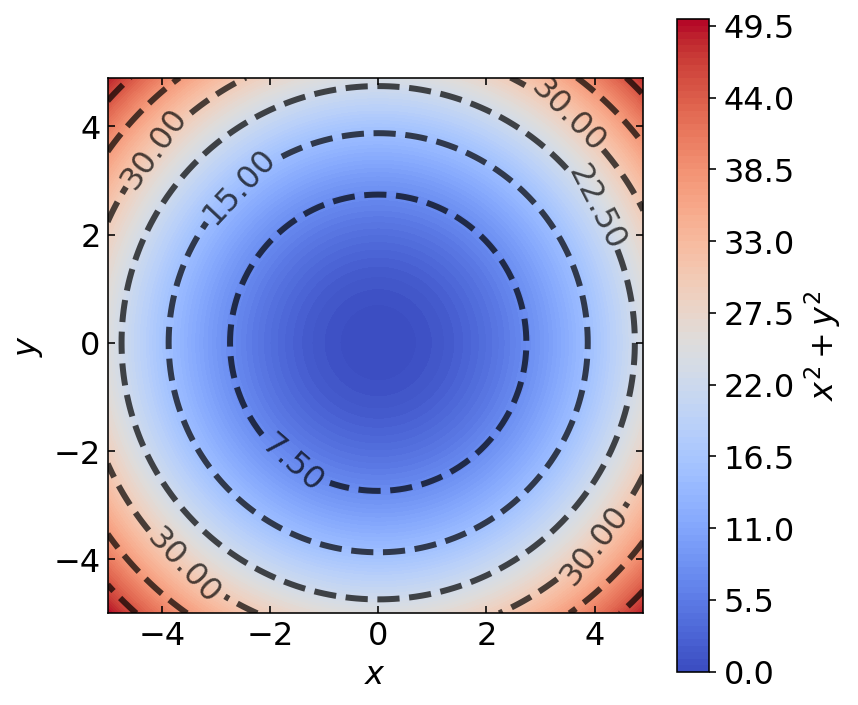

In [14]:
# draw figure, using (6,6) because the plot is small otherwise
# we use a square figure size because x and y ranges are both -5 to 5
plt.figure(figsize=(6,6))

# plot heatmap
#   cmap defines the overall color within the heatmap 
#   levels: determines the number and positions of the contour lines / regions.
cs = plt.contourf(x, y, z(x,y).reshape(m, n),cmap=cm.coolwarm, levels=100)

# plot color bar
cbar = plt.colorbar(cs)

# plot title in color bar
cbar.ax.set_ylabel(r'$x^2 + y^2$', fontsize=16, fontweight='bold')

# set font size in color bar
cbar.ax.tick_params(labelsize=16)

# plot equipotential line
#  [::10] means sampling 1 in every 10 samples
#  colors define the color want to use, 'k' for black
#  alpha is blending value, between 0 (transparent) and 1 (opaque).
#  linestyle defines the linestyle.
#  linewidth defines the width of line
cs2 = plt.contour(cs, levels=cs.levels[::15], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

# plot the heatmap label
#  %2.2f means display 2 digit before and after the decimal
#  fontsize defines the size of the text in figure
plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

# define tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)

# set squared figure
plt.axis('square')

# plot titile and x,y label
plt.xlabel(r'$x$', fontsize=16, fontweight='bold')
plt.ylabel(r'$y$', fontsize=16, fontweight='bold')
plt.show()

# save figure (important for publications)
# plt.savefig('heatmap.png',bbox_inches='tight')
